<a href="https://colab.research.google.com/github/DimbikeY/Neuronetworks/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D0%BC%D0%B5%D1%82%D0%BE%D0%B2_%D0%BE%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание предметов одежды
## Входной слой состоит из 800 нейронов. Выходной слой из 10 нейронов, которые показывают вероятность того, что на изображении данный предмет одежды.
## Каждый снимок состоит из 28x28 пикселей с интенсивностью от 0 до 255.

In [28]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential # слой за слоем последовательно
from tensorflow.keras.layers import Dense # полносвязная нейронная сеть
from tensorflow.keras import utils
import numpy as np
from tensorflow.keras.models import load_model # для скачивания целой модели
from tensorflow.keras.preprocessing import image # для фото jpeg
import matplotlib.pyplot as plt
#from PIL import Image
from google.colab import files # для работы с ноутбуком
from IPython.display import Image
%matplotlib inline

In [29]:
# Загружаем данные
## (x,y)_train - обучающие, (x,y)_test - для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

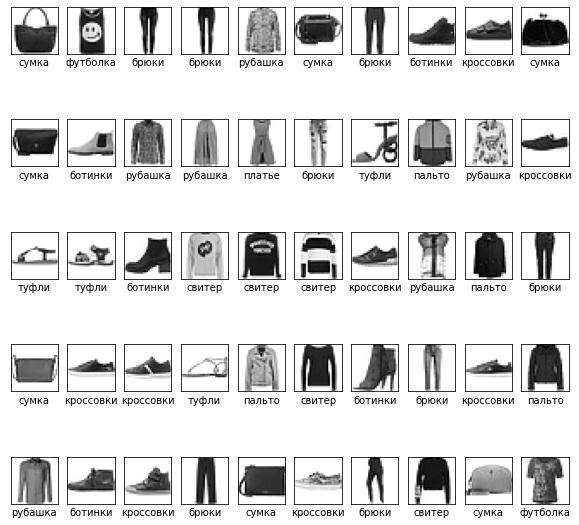

In [30]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [41]:
# Преобразуем метки в категории в формат "one hot encoding"
y_train = utils.to_categorical(y_train, 10) # 10 классов определения одежды всего
y_test = utils.to_categorical(y_test, 10)
# Название классов
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

In [32]:
# Преобразование размерности изображений
x_train = x_train.reshape(60000, 784) # поскольку Dense может работать только с плоскими веткорами
x_test = x_test.reshape(10000, 784)

# Нормализация данных
x_train = x_train / 255
x_test = x_test / 255 

## Создаём нейронную сеть

In [36]:
# Создаём последовательную модель
model = Sequential()

# Добавляем уровни сети
model.add(Dense(800, input_dim = 784, activation = "relu")) # relu - полулинейная функция активации
model.add(Dense(10, activation = "softmax")) # softmax используется для представления вероятности (сумма = 1)

# Компилируем модель
model.compile(loss = "categorical_crossentropy", optimizer= "SGD", metrics = ["accuracy"]) # SGD - градиентный спуск 
# Функция ошибки - категориальная перекрёстная энтропия - хорошо подходит, если классов более 2
# Метрика качества - это доля правильных ответов в нейронной сети, сумма которых = 1

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Данные подготовлены. Нейронная сеть описана и скомпилирована. Теперь обучаем сеть

In [ ]:
model.fit(x_train, y_train, batch_size = 200, epochs = 100, verbose = 1) 
# Берём 200 изображений, рассчитываем функцию ошибки => градиент и изменение весов
# Повторяем до конца мини-выборок и эпох (на всём наборе данных 100 раз)

In [38]:
# Сохраняем нейронную сеть для последующего использования
model.save('fashion_mnist_dense.h5')

In [42]:
# Оцениванием качество обучения
scores = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.8701


In [88]:
# Доля правильных ответов
print(f"Доля правильных ответов на тестовых данных, в процентах {round(scores[1] * 100, 4)}!")

Доля правильных ответов на тестовых данных, в процентах 87.01!


In [87]:
predictions = model.predict(x_train)
print(predictions[5])

# Выводим номер класса, предсказанный нейросетью
print(f"Вывели номер класса {np.argmax(predictions[5])}. Этот класс называтеся {classes[np.argmax(predictions[5])]}")

# Выводим правильный номер класса
print("Правильный ответ", np.argmax(y_train[5]), classes[np.argmax(y_train[5])])



1875/1875 [==============================] - 3s 1ms/step
[8.7908360e-05 1.3493375e-05 9.9823582e-01 1.9028057e-05 1.2227660e-03
 7.1309630e-10 4.1114655e-04 1.9360742e-11 9.8291657e-06 5.4426911e-11]
Вывели номер класса 2. Этот класс называтеся свитер
Правильный ответ 1 брюки


## Загражаем свою картинку

In [78]:
files.upload()


Saving 209-5025-01-4 (3)-1000x1000.jpg to 209-5025-01-4 (3)-1000x1000.jpg


{'209-5025-01-4 (3)-1000x1000.jpg': b'\xff\xd8\xff\xdb\x00\x84\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x02\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x01\x01\x01\x01\x01\x01\x01\x02\x01\x01\x02\x02\x02\x01\x02\x02\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\x03\xff\xdd\x00\x04\x00}\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xc0\x00\x11\x08\x03\xe8\x03\xe8\x03\x00\x11\x00\x01\x11\x01\x02\x11\x01\xff\xc4\x00\xd0\x00\x00\x01\x03\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x06\x07\x08\t\n\x01\x00\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\x10\x00\x01\x03\x02\x04\x03\x05\x05\x06\x06\

Проверяем загрузку картинки

In [79]:
!ls

'209-5025-01-4 (3)-1000x1000.jpg'   caf0o86a4v5ia3u4p9lg.jpg   top522.jpg
 2368408108_38_5.jpg		    fashion_mnist_dense.h5
 2471.jfif			    sample_data


Загружаем картинку из файла

In [80]:
img_path = '209-5025-01-4 (3)-1000x1000.jpg' # Скопируй название фото.jpg
img = image.load_img(img_path, target_size=(28,28), color_mode = "grayscale")

Показываем картинку

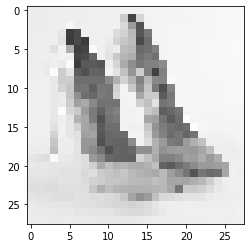

In [81]:
plt.imshow(img.convert("RGBA"))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [82]:
# Преобразуем картинку в массив
x = image.img_to_array(img)

# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)

# Инвертируем изображение
x = 255 - x

# Нормализуем изображение
x /= 255

Запускам предсказывание

In [83]:
prediction = model.predict(x)

1/1 [==============================] - 0s 18ms/step


Результаты

In [84]:
prediction

array([[6.9444314e-02, 8.6857947e-03, 2.2398528e-01, 1.2209242e-02,
        9.9534847e-02, 1.0155832e-05, 4.4612557e-01, 2.2333172e-05,
        1.3997974e-01, 2.7323053e-06]], dtype=float32)

In [85]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 6
Название класса: рубашка
